In [33]:
#Libraries
import pandas as pd
import numpy as np
from pathlib import Path #this library minimizes issues when using paths in Mac
import os
#pip install dataprep --user
from dataprep.eda import create_report
import re
import seaborn as sns
import streamlit as st
import datetime

import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

from scipy.stats.mstats import winsorize
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (train_test_split,GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)


In [34]:
#pip freeze > requirements.txt

In [35]:
#Seaborn Context
sns.set_theme(style='whitegrid', context='talk', palette='deep')
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1));
#sns.set_palette(['#62C370', '#FFD166', '#EF476F'])# Plot
#plt.figure(figsize=(9, 5)) 

In [36]:
#List of Folders
prod_folder = Path("data/Value_of_Production_E_All_Data")

In [37]:
prod_df = pd.read_csv(prod_folder /"Value_of_Production_E_All_Data.csv", encoding = 'unicode_escape')


In [38]:
prod_df.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Y1961,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",152,Gross Production Value (constant 2014-2016 tho...,1000 Int. $,NaN,...,166057.0,E,137986.0,E,173995.0,E,193168.0,E,198739.0,E
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",56,Gross Production Value (current thousand SLC),1000 SLC,NaN,...,6539411.0,E,5213293.0,E,6239642.0,E,6707803.0,E,7160695.0,E
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",55,Gross Production Value (constant 2014-2016 tho...,1000 SLC,NaN,...,7004306.0,E,5820251.0,E,7339134.0,E,8147840.0,E,8382859.0,E
3,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",152,Gross Production Value (constant 2014-2016 tho...,1000 Int. $,NaN,...,37675.0,E,41176.0,E,39326.0,E,39392.0,E,39965.0,E
4,2,'004,Afghanistan,515,'01341,Apples,152,Gross Production Value (constant 2014-2016 tho...,1000 Int. $,7127.0,...,66506.0,E,80449.0,E,102515.0,E,118153.0,E,127845.0,E


In [39]:
#Remove F columns as they only contain "E" as index.
prod_df = prod_df[prod_df.columns.drop(list(prod_df.filter(regex='.*?F')))]
prod_df.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Y1961,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",152,Gross Production Value (constant 2014-2016 tho...,1000 Int. $,NaN,...,306454.0,313477.0,213443.0,138537.0,122590.0,166057.0,137986.0,173995.0,193168.0,198739.0
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",56,Gross Production Value (current thousand SLC),1000 SLC,NaN,...,13995080.0,14911000.0,9806240.0,6160180.0,5233830.0,6539411.0,5213293.0,6239642.0,6707803.0,7160695.0
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",55,Gross Production Value (constant 2014-2016 tho...,1000 SLC,NaN,...,12926285.0,13222512.0,9003038.0,5843497.0,5170855.0,7004306.0,5820251.0,7339134.0,8147840.0,8382859.0
3,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",152,Gross Production Value (constant 2014-2016 tho...,1000 Int. $,NaN,...,27187.0,27170.0,27170.0,46732.0,39124.0,37675.0,41176.0,39326.0,39392.0,39965.0
4,2,'004,Afghanistan,515,'01341,Apples,152,Gross Production Value (constant 2014-2016 tho...,1000 Int. $,7127.0,...,29283.0,33040.0,37098.0,42198.0,42354.0,66506.0,80449.0,102515.0,118153.0,127845.0


In [40]:
prod_df = prod_df[prod_df["Element"]=='Gross Production Value (constant 2014-2016 thousand I$)']
prod_df = prod_df[prod_df.columns.drop(["Area Code (M49)", "Area Code", "Item Code","Item Code (CPC)", "Element", "Element Code", "Unit"])]

In [41]:
prod_df

,Area,Item,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,Afghanistan,"Almonds, in shell",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,306454.0,313477.0,213443.0,138537.0,122590.0,166057.0,137986.0,173995.0,193168.0,198739.0
3,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27187.0,27170.0,27170.0,46732.0,39124.0,37675.0,41176.0,39326.0,39392.0,39965.0
4,Afghanistan,Apples,7127.0,7127.0,7127.0,8685.0,9629.0,10762.0,13027.0,13169.0,...,29283.0,33040.0,37098.0,42198.0,42354.0,66506.0,80449.0,102515.0,118153.0,127845.0
7,Afghanistan,Apricots,26210.0,26210.0,26210.0,32107.0,35547.0,39642.0,48079.0,48652.0,...,55692.0,68391.0,73715.0,73715.0,71820.0,14656.0,107965.0,89347.0,105955.0,107942.0
10,Afghanistan,Barley,73644.0,73644.0,73644.0,74034.0,74034.0,73060.0,69553.0,70332.0,...,59597.0,98192.0,100141.0,101504.0,78515.0,58809.0,18508.0,11062.0,24076.0,24890.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68072,Net Food Importing Developing Countries,Non Food,5564792.0,5640248.0,5952970.0,6300827.0,6247381.0,6698287.0,6649156.0,6738852.0,...,11320715.0,11012377.0,11288907.0,11390741.0,11470386.0,11843217.0,12365338.0,13104267.0,13556500.0,13522022.0
68075,Net Food Importing Developing Countries,"Roots and Tubers, Total",6474719.0,6654444.0,6751752.0,6887640.0,7210466.0,7189641.0,7579110.0,7708317.0,...,32380570.0,32728449.0,34749921.0,33968686.0,34645324.0,34789495.0,36284757.0,38249146.0,39664322.0,40146107.0
68078,Net Food Importing Developing Countries,Sugar Crops Primary,5469037.0,4790713.0,4884947.0,5025752.0,5805630.0,5596718.0,6325438.0,5854470.0,...,8949455.0,9339469.0,10153023.0,10221735.0,10348037.0,10630615.0,10946581.0,10072965.0,10232766.0,10779535.0
68081,Net Food Importing Developing Countries,Vegetables and Fruit Primary,16847502.0,17631197.0,18062831.0,18953091.0,19137665.0,19962366.0,20952264.0,21679442.0,...,73753986.0,75586690.0,77638557.0,82478685.0,85779474.0,85471814.0,87402288.0,89448388.0,93275274.0,95932800.0


In [42]:
prod_wide=pd.wide_to_long(prod_df, stubnames='Y', i=['Area', 'Item'], j='Year').reset_index()

In [43]:
prod_wide

,Area,Item,Year,Y
0,Afghanistan,"Almonds, in shell",1961,NaN
1,Afghanistan,"Almonds, in shell",1962,NaN
2,Afghanistan,"Almonds, in shell",1963,NaN
3,Afghanistan,"Almonds, in shell",1964,NaN
4,Afghanistan,"Almonds, in shell",1965,NaN
...,...,...,...,...
1221775,Net Food Importing Developing Countries,Vegetables Primary,2016,32673721.0
1221776,Net Food Importing Developing Countries,Vegetables Primary,2017,33007769.0
1221777,Net Food Importing Developing Countries,Vegetables Primary,2018,34071702.0
1221778,Net Food Importing Developing Countries,Vegetables Primary,2019,35060480.0


In [44]:
prod_wide = prod_wide[prod_wide["Area"].isin(['Ireland', 'Colombia', 'New Zealand', 'Denmark', 'Spain'])]

In [45]:
prod_wide = prod_wide[prod_wide["Item"].isin(['Apples', 'Hen eggs in shell, fresh', 'Meat indigenous, total', 'Milk, Total'])]

In [46]:
#create_report(prod_wide).show_browser()

  0%|                                                                                          | 0/605 [00:00<…

In [ ]:
#STREAMLIT APP

for item in prod_wide['Item'].unique():
    fig = plt.figure(figsize=(8,7))
    plt.title(item)
    sns.lineplot(data=prod_wide[prod_wide['Item']==item].drop('Item', axis=1), x='Year', y='Y', hue='Area')
    st.pyplot(fig)

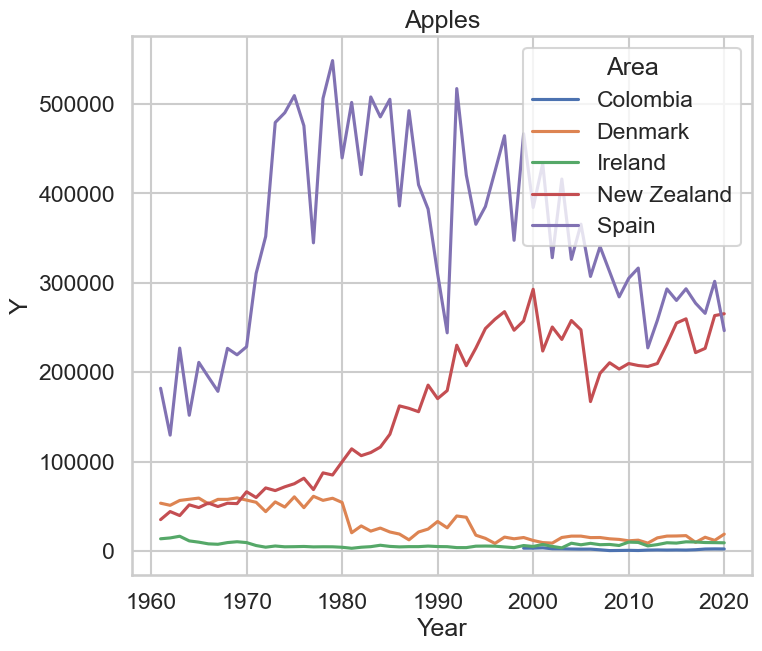

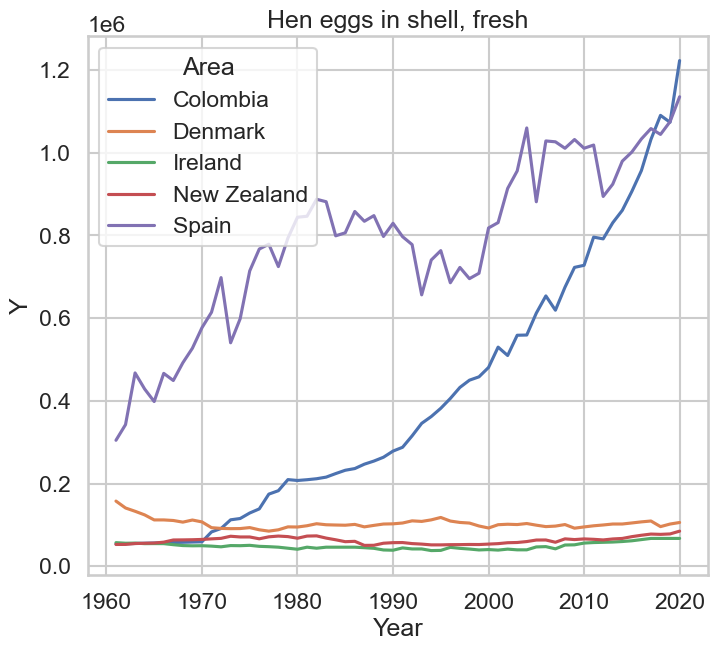

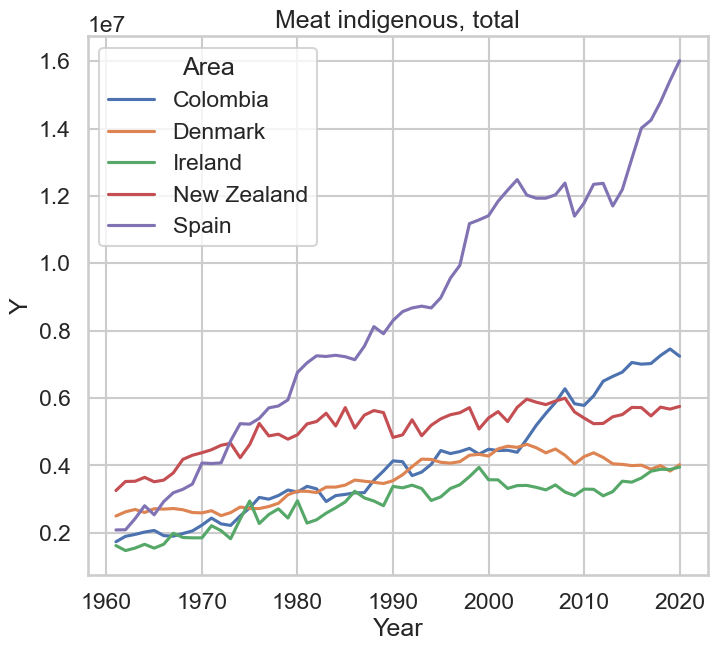

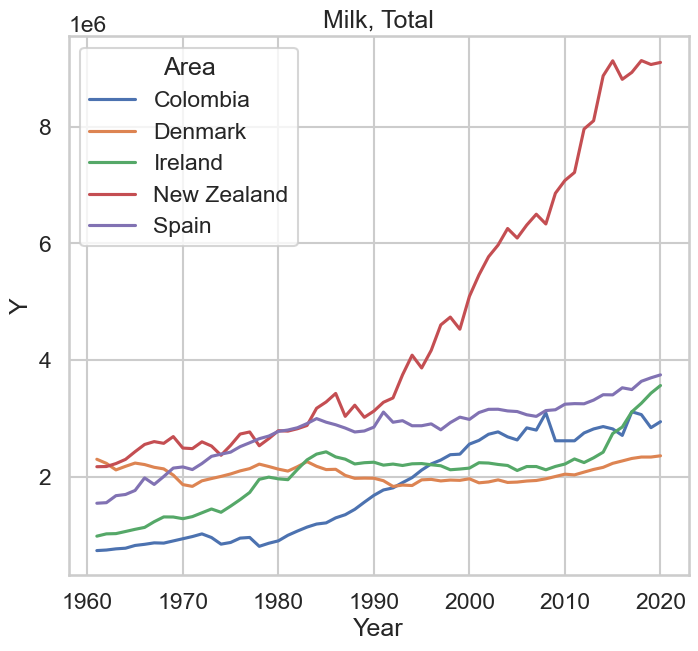

In [51]:
for item in prod_wide['Item'].unique():
    fig = plt.figure(figsize=(4,4))
    plt.title(item)
    sns.lineplot(data=prod_wide[prod_wide['Item']==item].drop('Item', axis=1), x='Year', y='Y', hue='Area')
    plt.show(fig)